In [12]:
!pip install tensorflow h5py numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rashe\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import h5py
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:

# # the paths of the dataset
# test_file_path = "C:\\Desktop\\Mubadala Project\\test_30400-002.hdf5"
# train_file_path = "C:\\Desktop\\Mubadala Project\\train_200000-001.hdf5"


# print("File exists:", os.path.exists(train_file_path))


# #########################Train-Satuation################################
# ########################################################################

# # with h5py.File(train_file_path, 'r') as f:
# #     train_key = list(f.keys())[0]  # Get the first key dynamically
# #     train_saturation = f[train_key]

# #     print("Test Dataset Shape:", train_saturation.shape)

# #     # Load only a small portion (first 1000 samples) and convert to float32
# #     test_data_sat = train_saturation[:, :, :1000, :].astype(np.float32)
    
# #     print("Loaded Partial Test Data Shape:", test_data_sat.shape)
    
# #########################Train-Satuation################################
# ########################################################################



# #########################Train-Permeability#############################
# ########################################################################

# # with h5py.File(train_file_path, 'r') as f:
# #     train_key = list(f.keys())[1]  # Get the first key dynamically
# #     train_perm = f[train_key]

# #     print("Test Dataset Shape:", train_perm.shape)

# #     # Load only a small portion (first 1000 samples) and convert to float32
# #     test_data_perm = train_perm[:, :, :1000, :].astype(np.float32)
    
# #     print("Loaded Partial Test Data Shape:", test_data_perm.shape)
    
# #########################Train-Permeability#############################
# ########################################################################



# #########################Test-Satuation#################################
# ########################################################################

# with h5py.File(test_file_path, 'r') as f:
#     test_key = list(f.keys())[0]  # Get the first key dynamically
#     test_saturation = f[test_key]

#     print("Test Dataset Shape:", test_saturation.shape)

#     # Load only a small portion (first 1000 samples) and convert to float32
#     test_data_sat = test_saturation[:, :, :1000, :].astype(np.float32)
    
#     print("Loaded Partial Test Data Shape:", test_data_sat.shape)

# #########################Test-Satuation#################################
# ########################################################################



# #########################Test-Permeability##############################
# ########################################################################

# with h5py.File(test_file_path, 'r') as f:
#     test_key = list(f.keys())[1]  # Get the first key dynamically
#     test_perm = f[test_key]

#     print("Test Dataset Shape:", test_perm.shape)

#     # Load only a small portion (first 1000 samples) and convert to float32
#     test_data_perm = test_perm[:, :, :1000, :].astype(np.float32)
    
#     print("Loaded Partial Test Data Shape:", test_data_perm.shape)

# #########################Test-Permeability##############################
# ########################################################################



# # Select a single slice (e.g., the first timestep or sample)
# slice_index = 123  # Change this to see different slices

# plt.figure(figsize=(6, 6))
# plt.imshow(test_data_sat[:, :, slice_index, 0], cmap="viridis")  # Adjust colormap if needed
# plt.colorbar(label="Saturation")
# plt.title(f"Saturation Distribution - Slice {slice_index}")
# plt.xlabel("----")
# plt.ylabel("----")
# plt.show()

# slice_index = 123  # Change this to see different slices

# plt.figure(figsize=(6, 6))
# plt.imshow(test_data_perm[:, :, slice_index, 1], cmap="viridis")  # Adjust colormap if needed
# plt.colorbar(label="Permeability")
# plt.title(f"Permeability - Slice {slice_index}")
# plt.xlabel("----")
# plt.ylabel("----")
# plt.show()


Test File Exists: True
Train File Exists: True
Test Dataset Keys: ['S', 'k']
Test Saturation Shape: (128, 128, 30400, 1)
Test Permeability Shape: (128, 128, 30400, 3)
Loaded Test Saturation Shape: (128, 128, 1000, 1)
Loaded Test Permeability Shape: (128, 128, 1000, 3)
Training Dataset Keys: ['S', 'k']
Train Saturation Shape: (128, 128, 200000, 1)
Train Permeability Shape: (128, 128, 200000, 3)
Loaded Train Saturation Shape: (128, 128, 1000, 1)
Loaded Train Permeability Shape: (128, 128, 1000, 3)


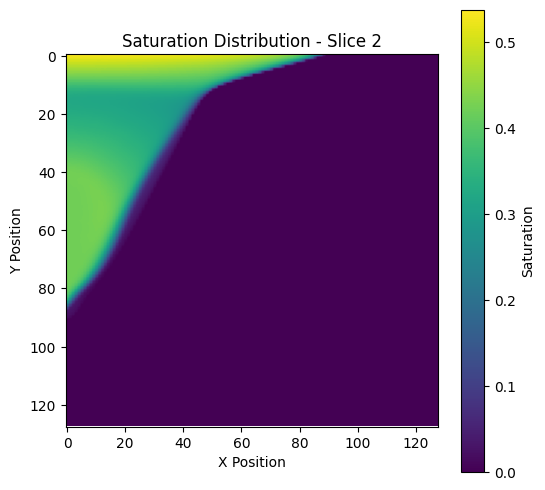

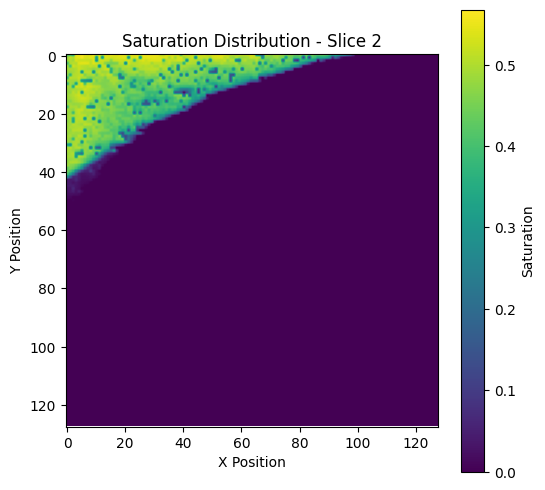

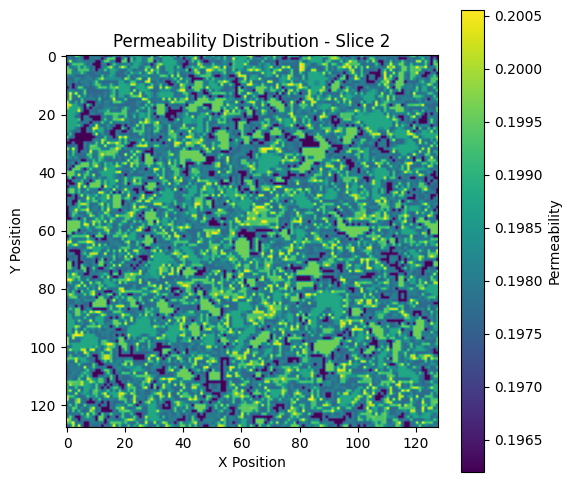

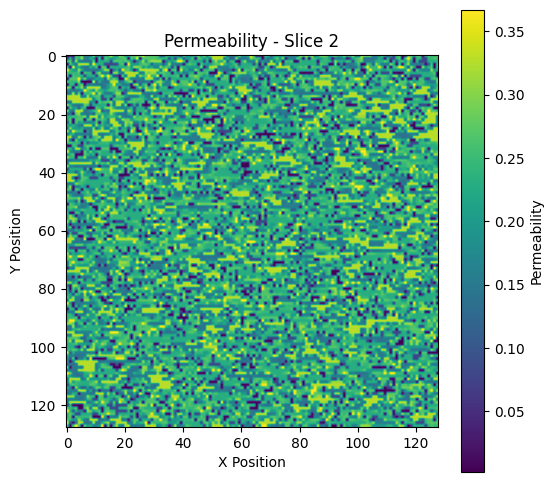

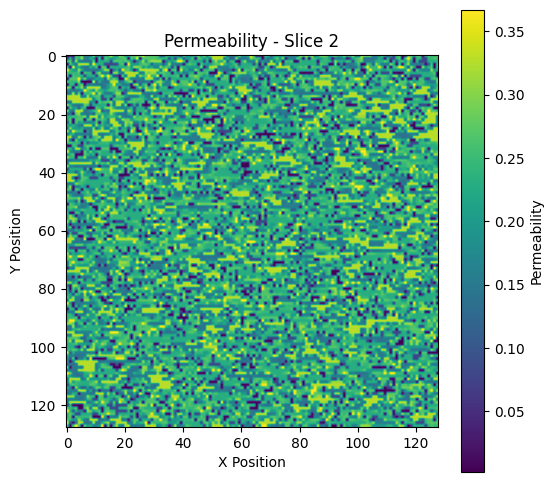

In [15]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Dataset paths
test_file_path = "C:\Desktop\\Mubadala Project\\test_30400-002.hdf5"
train_file_path = "C:\Desktop\Mubadala Project\\train_200000-001.hdf5"

# Check if files exist
print("Test File Exists:", os.path.exists(test_file_path))
print("Train File Exists:", os.path.exists(train_file_path))

# ========================= Load Test Data =========================
with h5py.File(test_file_path, 'r') as f:
    keys = list(f.keys())  # Get dataset keys
    print("Test Dataset Keys:", keys)

    # Load Saturation Data
    test_saturation = f[keys[0]]
    print("Test Saturation Shape:", test_saturation.shape)

    # Load Permeability Data
    test_permeability = f[keys[1]]
    print("Test Permeability Shape:", test_permeability.shape)

    # Load small portion of test data (to save memory)
    num_samples = 1000  # Modify this if needed
    test_data_sat = test_saturation[:, :, :num_samples, :].astype(np.float32)
    test_data_perm = test_permeability[:, :, :num_samples, :].astype(np.float32)

    print("Loaded Test Saturation Shape:", test_data_sat.shape)
    print("Loaded Test Permeability Shape:", test_data_perm.shape)

# ========================= Load Training Data (not working) =========================
# Uncomment once the training file is fixed

with h5py.File(train_file_path, 'r') as f:
    keys = list(f.keys())  # Get dataset keys
    print("Training Dataset Keys:", keys)

    # Load Saturation Data
    train_saturation = f[keys[0]]
    print("Train Saturation Shape:", train_saturation.shape)

    # Load Permeability Data
    train_permeability = f[keys[1]]
    print("Train Permeability Shape:", train_permeability.shape)

    # Load small portion of train data (to save memory)
    train_data_sat = train_saturation[:, :, :num_samples, :].astype(np.float32)
    train_data_perm = train_permeability[:, :, :num_samples, :].astype(np.float32)

    print("Loaded Train Saturation Shape:", train_data_sat.shape)
    print("Loaded Train Permeability Shape:", train_data_perm.shape)


# ========================= Plot Saturation =========================
slice_index = 2  # Choose a slice to visualize

# For Training 
plt.figure(figsize=(6, 6))
plt.imshow(train_data_sat[:, :, slice_index, 0], cmap="viridis")
plt.colorbar(label="Saturation")
plt.title(f"Saturation Distribution - Slice {slice_index}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

# For Testing
plt.figure(figsize=(6, 6))
plt.imshow(test_data_sat[:, :, slice_index, 0], cmap="viridis")
plt.colorbar(label="Saturation")
plt.title(f"Saturation Distribution - Slice {slice_index}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()



# ========================= Plot Permeability =========================

# For training
plt.figure(figsize=(6, 6))
plt.imshow(train_data_perm[:, :, slice_index, 0], cmap="viridis")
plt.colorbar(label="Permeability")
plt.title(f"Permeability Distribution - Slice {slice_index}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(test_data_perm[:, :, slice_index, 0], cmap="viridis")
plt.colorbar(label="Permeability")
plt.title(f"Permeability - Slice {slice_index}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(test_data_perm[:, :, slice_index, 0], cmap="viridis")
plt.colorbar(label="Permeability")
plt.title(f"Permeability - Slice {slice_index}")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.show()

Test Permeability - Min: 0.0 Max: 1.0


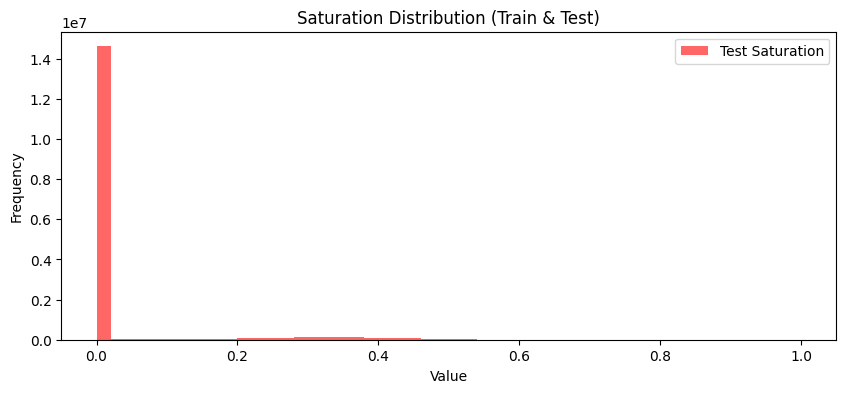

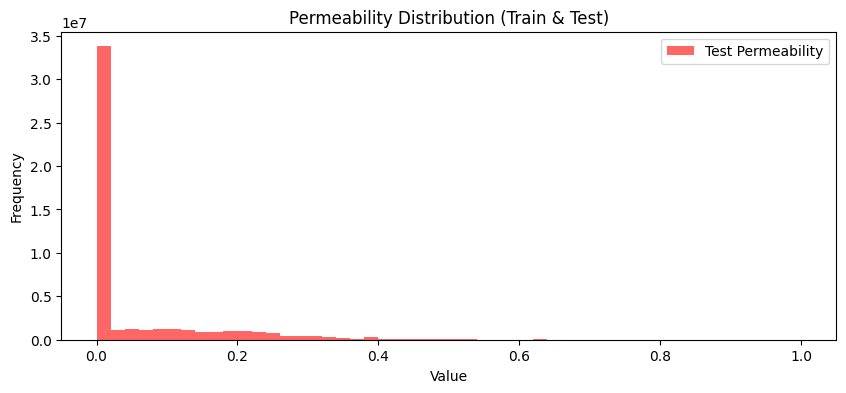

In [16]:
# Now we need to normalize the peramibility, Saturation is already between 0 - 1

# train_data_sat = train_data_sat
test_data_sat = test_data_sat

# Normalize Permeability using Min-Max Scaling to (0,1)
# train_perm_min, train_perm_max = train_data_perm.min(), train_data_perm.max()
test_perm_min, test_perm_max = test_data_perm.min(), test_data_perm.max()

# train_data_perm = (train_data_perm - train_perm_min) / (train_perm_max - train_perm_min)
test_data_perm = (test_data_perm - test_perm_min) / (test_perm_max - test_perm_min)

## Testing to see if the data has been normalised or not

# print("Train Permeability - Min:", train_data_perm.min(), "Max:", train_data_perm.max())
print("Test Permeability - Min:", test_data_perm.min(), "Max:", test_data_perm.max())


import matplotlib.pyplot as plt

# Plot Saturation Histogram
plt.figure(figsize=(10, 4))
# plt.hist(train_data_sat.flatten(), bins=50, alpha=0.6, color="blue", label="Train Saturation")
plt.hist(test_data_sat.flatten(), bins=50, alpha=0.6, color="red", label="Test Saturation")
plt.title("Saturation Distribution (Train & Test)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot Permeability Histogram
plt.figure(figsize=(10, 4))
# plt.hist(train_data_perm.flatten(), bins=50, alpha=0.6, color="blue", label="Train Permeability")
plt.hist(test_data_perm.flatten(), bins=50, alpha=0.6, color="red", label="Test Permeability")
plt.title("Permeability Distribution (Train & Test)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [17]:
# import numpy as np

# # Stack saturation and permeability along the channel dimension
# # X_train = np.concatenate([train_data_sat, train_data_perm], axis=-1)  # Shape (128, 128, num_samples, 2)
# X_test = np.concatenate([test_data_sat, test_data_perm], axis=-1)  # Shape (128, 128, num_samples, 2)
# X_train = np.concatenate([test_data_sat, test_data_perm], axis=-1)  # Shape (128, 128, num_samples, 2)

# # Reshape to match CNN input format (samples, height, width, channels)
# X_train = np.transpose(X_train, (2, 0, 1, 3))  # (num_samples, 128, 128, 2)
# X_test = np.transpose(X_test, (2, 0, 1, 3))  # (num_samples, 128, 128, 2)

# # Define input shape
# input_shape = (128, 128, 2)


# print("Final Training Data Shape:", X_train.shape)
# print("Final Test Data Shape:", X_test.shape)

# for i in range(X_test.shape[-1]):
#     print(f"Channel {i+1} (Test) - Min: {X_test[..., i].min()}, Max: {X_test[..., i].max()}")
    
# # Check if Channel 3 is identical to Channel 1
# is_dup_3 = np.allclose(X_test[..., 0], X_test[..., 2])

# # Check if Channel 4 is identical to Channel 1
# is_dup_4 = np.allclose(X_test[..., 0], X_test[..., 3])

# print(f"Is Channel 3 a duplicate of Channel 1? {is_dup_3}")
# print(f"Is Channel 4 a duplicate of Channel 1? {is_dup_4}")

# is_dup_3_4 = np.allclose(X_test[..., 2], X_test[..., 3])
# print(f"Is Channel 3 a duplicate of Channel 4? {is_dup_3_4}")

# print("Channel 3 (Test) - Min:", X_test[..., 2].min(), "Max:", X_test[..., 2].max())
# print("Channel 4 (Test) - Min:", X_test[..., 3].min(), "Max:", X_test[..., 3].max())

In [18]:
# import matplotlib.pyplot as plt

# # Choose a test sample index
# sample_idx = 900  # Change this to see different samples

# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Plot Channel 3
# axes[0].imshow(X_test[sample_idx, :, :, 2], cmap="viridis")
# axes[0].set_title("Channel 3 Visualization")
# axes[0].axis("off")

# # Plot Channel 4
# axes[1].imshow(X_test[sample_idx, :, :, 3], cmap="viridis")
# axes[1].set_title("Channel 4 Visualization")
# axes[1].axis("off")

# plt.show()
